# Biot-Savarts Lov

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 2

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en kvadratisk ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

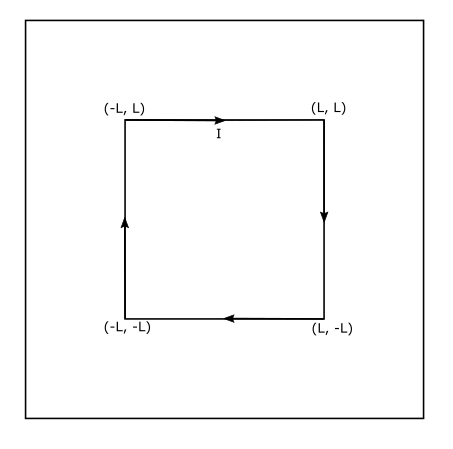

En av de enklere konfigurasjonene vi kan se for oss er en uendelig tynn kvadratisk ledning med konstant strøm, $I$, retning med klokka, som utspenner et kvadrat med sidelengde $L$ sentrert i origo (se figur over). Fra Biot-Savarts lov har vi at magnetfeltet rundt en uendelig tynn ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er avstanden fra $\vec{r}$ til ledningen, og integralet er tatt over hele ledningen.

$\textbf{a)}$ I denne orienteringen vil magnetfeltet alltid stå vinkelrett på planet slik at vi trenger kun å vite absoluttverdien, og i hvilke områder det peker opp eller ned. Med hensyn til dette, gjør om integralet over ledningen til en sum over diskrete punkter i ledningen. 

Vi deler opp ledningen i små segmenter $\Delta \vec{l}_i$ slik at integralet over hele ledningen kan tilnærmes ved en sum:

\begin{equation}
\vec{B}(\vec{r}) \approx \frac{\mu_0 I}{4\pi} \sum_{i} \frac{\Delta \vec{l}_i \times \vec{r}_i'}{|\vec{r}_i'|^3}
\end{equation}

hvor:
- $\Delta \vec{l}_i$ er et lite linjesegment av ledningen,
- $\vec{r}_i' = \vec{r} - \vec{l}_i$ er vektoren fra segmentet til punktet der vi beregner magnetfeltet.

### Diskretisering av ledningen
Vi antar at vi deler hver side av kvadratet inn i $N$ like segmenter. Hvert segment har lengde $\Delta l = \frac{2L}{N}$ og bidrar til magnetfeltet med et lite element:

\begin{equation}
\Delta \vec{B}_i = \frac{\mu_0 I}{4\pi} \frac{\Delta \vec{l}_i \times \vec{r}_i'}{|\vec{r}_i'|^3}
\end{equation}

Summen tas over alle fire sidene av kvadratet.

### Retningen på magnetfeltet
Fra symmetrigrunner vet vi at magnetfeltet i sentrum av kvadratet (origo) vil være rettet langs $z$-aksen. For hvert segment på én side av kvadratet, vil de motsatte segmentene bidra med feltkomponenter som kansellerer hverandre i planet, men som summerer seg i $z$-retningen.

Ved å summere over de fire sidene får vi en tilnærming til magnetfeltets størrelse og retning. For mer nøyaktighet kan vi velge et større $N$.


$\textbf{b)}$  Utfør et variabelskifte på magnetfeltet og posisjonen slik at størrelsene blir dimensjonsløse.

Vi innfører en skaleringsfaktor for lengdeskalaen \( L \), som er sidelengden til kvadratet. Dermed definerer vi den dimensjonsløse posisjonen som:

$$
\tilde{\vec{r}} = \frac{\vec{r}}{L}
$$

hvor \( \tilde{\vec{r}} \) er den dimensjonsløse posisjonen.

#### Dimensjonsløs magnetfeltstyrke
Fra Biot-Savarts lov vet vi at magnetfeltet har en faktor:

$$
B \sim \frac{\mu_0 I}{4\pi L}
$$

Vi definerer derfor en dimensjonsløs magnetfeltstyrke som:

$$
\tilde{\vec{B}} = \frac{4\pi L}{\mu_0 I} \vec{B}
$$

Ved å sette inn disse nye variablene i Biot-Savarts lov får vi den dimensjonsløse formen:

$$
\tilde{\vec{B}}(\tilde{\vec{r}}) = \int \frac{ d\tilde{\vec{l}} \times \tilde{\vec{r}}' }{ |\tilde{\vec{r}}'|^3 }
$$

hvor den dimensjonsløse integrasjonsvariabelen er:

$$
d\tilde{\vec{l}} = \frac{d\vec{l}}{L}
$$

og den dimensjonsløse avstanden er:

$$
\tilde{\vec{r}}' = \tilde{\vec{r}} - \tilde{\vec{l}}
$$

Dermed har vi transformert Biot-Savarts lov til en dimensjonsløs form hvor alle lengder måles i enheter av \( L \) og magnetfeltet er gitt i enheter av $\frac{\mu_0 I}{4\pi L}$.


$\textbf{c)}$ En av utfordringene med et problem som dette er å diskretisere geometrien til ledningen. Her har ledningen en ganske enkel form, nemlig et kvadrat, men i prinsippet vil koden kunne fungere for en vilkårlig lukket løkke. Med tanke på at integralet blir til en sum over ledningen, lag en array som inneholder posisjonen til alle de diskrete punktene i ledningen. 

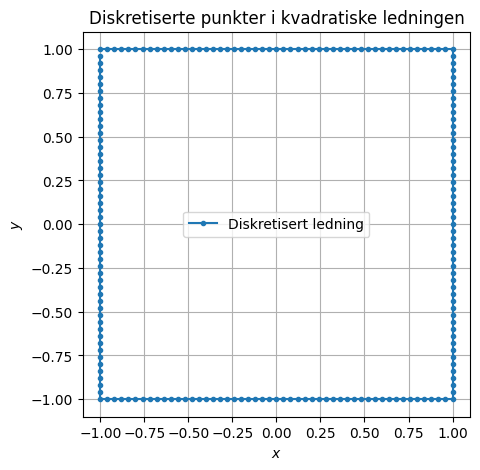

In [24]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  
N = 50   
total_points = 4 * N  

# Create empty array for positions
positions = np.zeros((total_points, 2))

t = np.linspace(-L, L, N, endpoint=False) 

# Define the four sides (clockwise)
positions[:N]      = np.column_stack((t, np.full(N, L)))   # Top side (left to right)
positions[N:2*N]   = np.column_stack((np.full(N, L), -t))  # Right side (top to bottom)
positions[2*N:3*N] = np.column_stack((-t, np.full(N, -L))) # Bottom side (right to left)
positions[3*N:]    = np.column_stack((np.full(N, -L), t))  # Left side (bottom to top)

plt.figure(figsize=(5,5))
plt.plot(positions[:,0], positions[:,1], 'o-', markersize=3, label="Diskretisert ledning")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Diskretiserte punkter i kvadratiske ledningen")
plt.grid()
plt.legend()
plt.show()

# Display the positions array
import pandas as pd

df_positions = pd.DataFrame(positions, columns=['x', 'y'])

$\textbf{d)}$ Gjennomfør den numeriske integrasjonen, og plot styrken av magnetfeltet for $x \in [-2L,2L]$ og $y \in [-2L,2L]$. Slik som i oppgave **1c)** i forrige numerisk øving vil magnetfeltet singulært nære ledningen, dette kan håndteres på lignende vis. Husk å ta hensyn til fortegn innenfor/utenfor løkken.

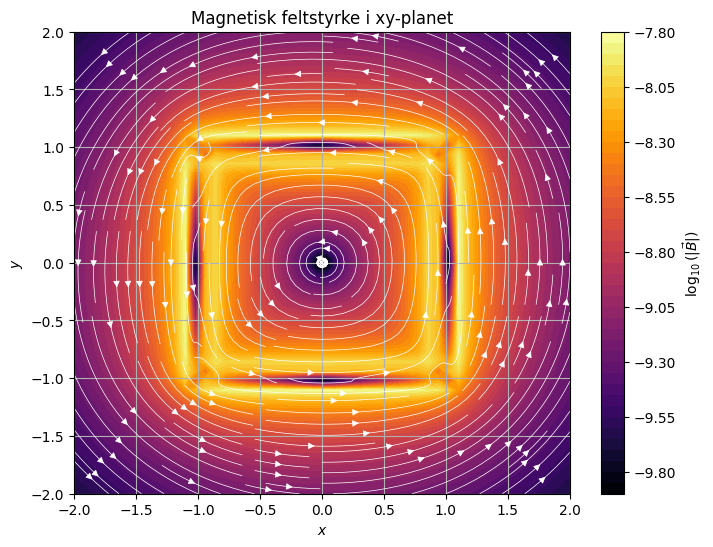

In [25]:
mu_0 = 4 * np.pi * 1e-7  
I = 1.0  
L = 1.0  
N = 100  
dL = (4 * L) / (4 * N)  


positions = np.zeros((4*N, 2))
t = np.linspace(-L, L, N, endpoint=False)

positions[:N]      = np.column_stack((t, np.full(N, L)))   # Top side
positions[N:2*N]   = np.column_stack((np.full(N, L), -t))  # Right side
positions[2*N:3*N] = np.column_stack((-t, np.full(N, -L))) # Bottom side
positions[3*N:]    = np.column_stack((np.full(N, -L), t))  # Left side

# dL = (dx, dy)
dL_vectors = np.roll(positions, -1, axis=0) - positions
dL_vectors[-1] = dL_vectors[0]  # Ensure loop closure


grid_size = 50  
x_range = np.linspace(-2*L, 2*L, grid_size)
y_range = np.linspace(-2*L, 2*L, grid_size)
X, Y = np.meshgrid(x_range, y_range)


Bx = np.zeros_like(X)
By = np.zeros_like(Y)

# Compute magnetic field using Biot-Savart sum
for i in range(4*N):
    # Position vector r' = r - l
    rx = X - positions[i, 0]
    ry = Y - positions[i, 1]
    r_mag = np.sqrt(rx**2 + ry**2)

    # Avoid singularity by setting a minimum radius
    r_mag[r_mag < 0.1] = 0.1
    
    # Compute cross product dL x r' (only z-component matters)
    cross_z = dL_vectors[i, 0] * ry - dL_vectors[i, 1] * rx
    
    # Compute dB
    dB = (mu_0 * I / (4 * np.pi)) * (cross_z / r_mag**3) * dL
    
    # Accumulate B-field components
    Bx += dB * (-ry / r_mag)  # Bx component
    By += dB * (rx / r_mag)   # By component

B_magnitude = np.sqrt(Bx**2 + By**2)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, np.log10(B_magnitude), levels=50, cmap="inferno")  # Log scale for better visualization
plt.colorbar(label=r'$\log_{10}(|\vec{B}|)$')
plt.streamplot(X, Y, Bx, By, color="white", density=1.5, linewidth=0.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Magnetisk feltstyrke i xy-planet")
plt.grid()
plt.show()


### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

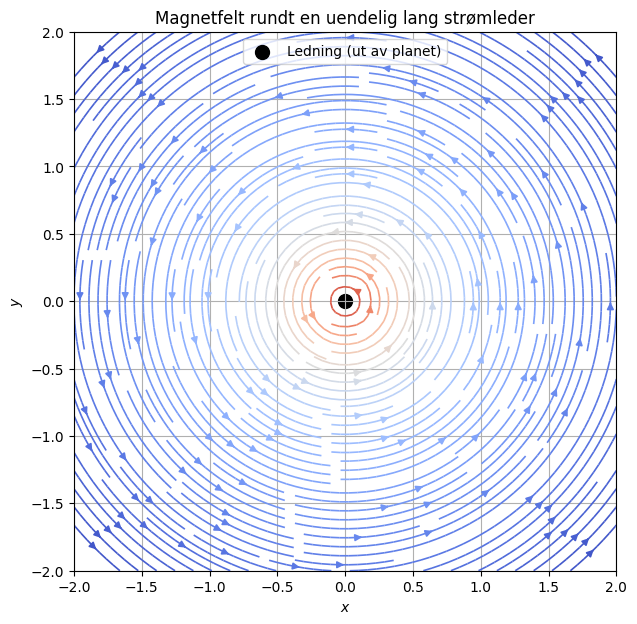

In [26]:
mu_0 = 4 * np.pi * 1e-7  
I = 1.0  
L = 2.0  
grid_size = 25  

x = np.linspace(-L, L, grid_size)
y = np.linspace(-L, L, grid_size)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
r[r < 0.1] = 0.1  # Avoid singularity at r = 0

# Compute the magnetic field magnitude (Ampère’s Law)
B_magnitude = (mu_0 * I) / (2 * np.pi * r)

# Compute direction using right-hand rule (tangential field)
Bx = -B_magnitude * (Y / r)  # -sin(theta)
By =  B_magnitude * (X / r)  # cos(theta)

plt.figure(figsize=(7,7))
plt.streamplot(X, Y, Bx, By, color=np.log(B_magnitude), cmap="coolwarm", linewidth=1.2, density=2)
plt.scatter(0, 0, color='black', marker='o', s=100, label="Ledning (ut av planet)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Magnetfelt rundt en uendelig lang strømleder")
plt.legend()
plt.grid()
plt.show()


$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.

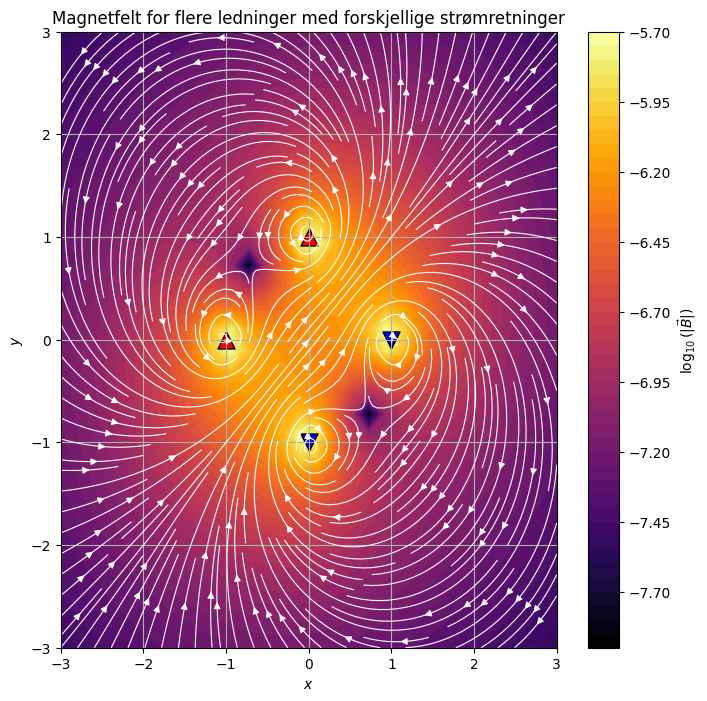

In [27]:
mu_0 = 4 * np.pi * 1e-7  
I = 1.0  
L = 3.0  
grid_size = 30  

x = np.linspace(-L, L, grid_size)
y = np.linspace(-L, L, grid_size)
X, Y = np.meshgrid(x, y)

# Define wire positions and currents (each wire: (x, y, current))
wires = [
    (-1, 0,  I),   # Wire at (-1,0) with current OUT of the plane
    ( 1, 0, -I),   # Wire at (1,0) with current INTO the plane
    ( 0, 1,  I),   # Wire at (0,1) with current OUT of the plane
    ( 0,-1, -I)    # Wire at (0,-1) with current INTO the plane
]

Bx = np.zeros_like(X)
By = np.zeros_like(Y)

# Compute total magnetic field from all wires
for x_w, y_w, I_w in wires:
    # Compute displacement vectors
    rx = X - x_w
    ry = Y - y_w
    r = np.sqrt(rx**2 + ry**2)
    r[r < 0.1] = 0.1  # Avoid singularities near wires
    
    # Compute magnitude of B (Ampère’s Law)
    B_magnitude = (mu_0 * abs(I_w)) / (2 * np.pi * r)

    # Compute field components using right-hand rule
    Bx += np.sign(I_w) * B_magnitude * (-ry / r)  # -sin(theta) * sign(I)
    By += np.sign(I_w) * B_magnitude * (rx / r)   # cos(theta) * sign(I)

B_magnitude = np.sqrt(Bx**2 + By**2)

# Plot the magnetic field
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, np.log10(B_magnitude), levels=50, cmap="inferno")  # Log scale for visibility
plt.colorbar(label=r'$\log_{10}(|\vec{B}|)$')
plt.streamplot(X, Y, Bx, By, color="white", linewidth=0.8, density=2)

# Plot wire positions
for x_w, y_w, I_w in wires:
    color = 'red' if I_w > 0 else 'blue'
    marker = '^' if I_w > 0 else 'v'
    plt.scatter(x_w, y_w, color=color, marker=marker, s=150, edgecolors="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Magnetfelt for flere ledninger med forskjellige strømretninger")
plt.grid()
plt.show()
